In [13]:
import hashlib
import time

def generate_random_numbers1(num, seed=None):
    if not seed:
        seed = int(time.time() * 1000) # задаем начальное значение генератора равное текущему времени в миллисекундах
    random_numbers = []
    for i in range(num):
        seed = int(hashlib.md5(str(seed).encode('utf-8')).hexdigest(), 16) # применяем хэш-функцию MD5 к seed
        random_numbers.append(seed)
    return random_numbers


In [41]:
import time

def generate_random_numbers2(num, seed=None, mask=0xAAAAAAAA):
    if not seed:
        seed = int(time.time() * 1000) # задаем начальное значение генератора равное текущему времени в миллисекундах
    random_numbers = []
    for i in range(num):
        seed ^= mask # применяем XOR-шифрование к seed
        random_numbers.append(seed)
    return random_numbers


In [54]:
random_numbers11 = generate_random_numbers1(100)
random_numbers12 = generate_random_numbers1(200)
random_numbers13 = generate_random_numbers1(300)
random_numbers14 = generate_random_numbers1(1000)
random_numbers15 = generate_random_numbers1(10000)
# print(random_numbers15)

In [55]:
random_numbers21 = generate_random_numbers2(100)
random_numbers22 = generate_random_numbers2(200)
random_numbers23 = generate_random_numbers2(300)
random_numbers24 = generate_random_numbers2(1000)
random_numbers25 = generate_random_numbers2(10000)
# print(random_numbers25)

In [131]:
from scipy.stats import chisquare
import math
import numpy as np
def calc_stats(data):
    n = len(data)
    mean = sum(data) / n
    variance = sum((x - mean)**2 for x in data) / (n - 1)
    stdev = math.sqrt(variance)
    cv = stdev / mean * 100
    print("Среднее значение: ", mean)
    print("Стандартное отклонение: ", stdev)
    print("Коэффициент вариации: ", cv)


In [132]:
sample = [random.randint(0,5) for _ in range(10000000)]
calc_stats(sample)
calc_stats(random_numbers12)
calc_stats(random_numbers13)
calc_stats(random_numbers14)

Среднее значение:  2.5003367
Стандартное отклонение:  1.707841204089913
1.7078411186738387
Коэффициент вариации:  68.30444892041592
Среднее значение:  1.6547984838164225e+38
Стандартное отклонение:  1.00176450751904e+38
9.99256957885328e+37
Коэффициент вариации:  60.53694859622388
Среднее значение:  1.627357778621983e+38
Стандартное отклонение:  9.894914071569576e+37
9.878408782228025e+37
Коэффициент вариации:  60.803556547647496
Среднее значение:  1.6882736125541054e+38
Стандартное отклонение:  9.845123331128953e+37
9.840199538207268e+37
Коэффициент вариации:  58.31473795432219


In [107]:
import random

# генерируем однородную выборку из 100 чисел на интервале [0, 9]
sample = [random.randint(0,5) for _ in range(10000000)]
# print(sample)

if test_uniformity(sample):
    print("Выборка однородна")
else:
    print("Выборка неоднородна")


Выборка неоднородна


In [114]:
from scipy.stats import chisquare

def chi_square_test(data):
    """
    Вычисляет критерий Хи-квадрат и соответствующее P-значение для заданной выборки и оценки ожидаемых частот на основе наблюдаемых.
    
    Аргументы:
    data -- список наблюдаемых частот
    
    Возвращает:
    Кортеж из двух элементов: статистику критерия Хи-квадрат и P-значение
    """
    n = sum(data)
    k = len(data)
    f_exp = [n / k] * k
    chi2_stat, p_val = chisquare(data, f_exp=f_exp)
    return chi2_stat, p_val
def test_uniformity(data, alpha=0.05):
    """
    Проверяет равномерность распределения выборки на основе критерия Хи-квадрат.
    
    Аргументы:
    data -- список наблюдаемых частот
    alpha -- уровень значимости (по умолчанию, 0.05)
    
    Возвращает:
    True, если выборка однородна; False, если выборка неоднородна
    """
    chi2_stat, p_val = chi_square_test(data)
    if p_val < alpha:
        return False
    else:
        return True


In [128]:
sample = [random.randint(0,5) for _ in range(10000000)]
if test_uniformity(sample):
    print("Выборка равномерна и случайна")
else:
    print("Выборка не является равномерной или случайной")

Выборка не является равномерной или случайной


In [135]:
import time

# засекаем время для первой функции
start_time = time.perf_counter()
generate_random_numbers1(1000)
end_time = time.perf_counter()
print("Время выполнения generate_random_numbers1 для 1000 элементов: ", end_time - start_time)

start_time = time.perf_counter()
generate_random_numbers1(10000)
end_time = time.perf_counter()
print("Время выполнения generate_random_numbers1 для 10000 элементов: ", end_time - start_time)

start_time = time.perf_counter()
generate_random_numbers1(100000)
end_time = time.perf_counter()
print("Время выполнения generate_random_numbers1 для 100000 элементов: ", end_time - start_time)

start_time = time.perf_counter()
generate_random_numbers1(1000000)
end_time = time.perf_counter()
print("Время выполнения generate_random_numbers1 для 1000000 элементов: ", end_time - start_time)
# засекаем время для второй функции
start_time = time.perf_counter()
generate_random_numbers2(1000)
end_time = time.perf_counter()
print("Время выполнения generate_random_numbers2 для 1000 элементов: ", end_time - start_time)

start_time = time.perf_counter()
generate_random_numbers2(10000)
end_time = time.perf_counter()
print("Время выполнения generate_random_numbers2 для 10000 элементов: ", end_time - start_time)

start_time = time.perf_counter()
generate_random_numbers2(100000)
end_time = time.perf_counter()
print("Время выполнения generate_random_numbers2 для 100000 элементов: ", end_time - start_time)

start_time = time.perf_counter()
generate_random_numbers2(1000000)
end_time = time.perf_counter()
print("Время выполнения generate_random_numbers2 для 1000000 элементов: ", end_time - start_time)

# засекаем время для стандартной функции
start_time = time.perf_counter()
random_numbers = [random.randint(0, 100) for i in range(1000)]
end_time = time.perf_counter()
print("Время выполнения стандартной функции для 1000 элементов: ", end_time - start_time)
start_time = time.perf_counter()
random_numbers = [random.randint(0, 100) for i in range(10000)]
end_time = time.perf_counter()
print("Время выполнения стандартной функции для 10000 элементов: ", end_time - start_time)
start_time = time.perf_counter()
random_numbers = [random.randint(0, 100) for i in range(5000)]
end_time = time.perf_counter()
print("Время выполнения стандартной функции для 100000 элементов: ", end_time - start_time)

start_time = time.perf_counter()
random_numbers = [random.randint(0, 100) for i in range(1000000)]
end_time = time.perf_counter()
print("Время выполнения стандартной функции для 1000000 элементов: ", end_time - start_time)


Время выполнения generate_random_numbers1 для 1000 элементов:  0.001946999999745458
Время выполнения generate_random_numbers1 для 10000 элементов:  0.018538100000114355
Время выполнения generate_random_numbers1 для 100000 элементов:  0.16841459999977815
Время выполнения generate_random_numbers1 для 1000000 элементов:  1.689624499999809
Время выполнения generate_random_numbers2 для 1000 элементов:  0.0001723000004858477
Время выполнения generate_random_numbers2 для 10000 элементов:  0.0010757999998531886
Время выполнения generate_random_numbers2 для 100000 элементов:  0.011207999999896856
Время выполнения generate_random_numbers2 для 1000000 элементов:  0.12222490000021935
Время выполнения стандартной функции для 1000 элементов:  0.0009879999997792765
Время выполнения стандартной функции для 10000 элементов:  0.009036199999172823
Время выполнения стандартной функции для 100000 элементов:  0.004451099999641883
Время выполнения стандартной функции для 1000000 элементов:  0.923664300000382

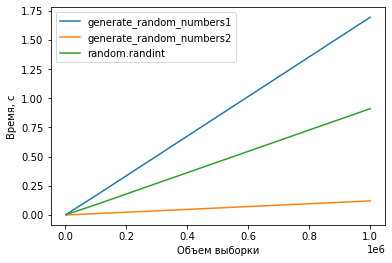

In [136]:
import time

# засекаем время для первой функции
times1 = []
times2 = []
times_std = []
for num in [1000, 10000, 100000, 1000000]:
    start_time = time.perf_counter()
    generate_random_numbers1(num)
    end_time = time.perf_counter()
    times1.append(end_time - start_time)

    start_time = time.perf_counter()
    generate_random_numbers2(num)
    end_time = time.perf_counter()
    times2.append(end_time - start_time)

    start_time = time.perf_counter()
    random_numbers = [random.randint(0, 100) for i in range(num)]
    end_time = time.perf_counter()
    times_std.append(end_time - start_time)
import matplotlib.pyplot as plt

nums = [1000, 10000, 100000, 1000000]

plt.plot(nums, times1, label='generate_random_numbers1')
plt.plot(nums, times2, label='generate_random_numbers2')
plt.plot(nums, times_std, label='random.randint')
plt.legend()
plt.xlabel('Объем выборки')
plt.ylabel('Время, с')
plt.show()
